In [1]:
#Problem Ststemant
#Develop a Sentiment Analysis to classify restarunt reviews as Positive or Negative

In [ ]:
#Description
# With the rapid growth of online platforms for sharing opinions and reviews,restarunts often rely on the customer 
# feedback to improve thier services and attract a new customers
# Analysong the sentiment ofthese revies can provide valuable insights into customer satisfaction.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("/home/rgukt/Downloads/Reviews.csv")


In [3]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
data.head() #first 5rows

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
data.tail()#last 5 rows

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
data.describe() #statistical info about the dataset

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [8]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [9]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [10]:
value_counts=data['Liked'].value_counts()
print(value_counts)

Liked
1    500
0    500
Name: count, dtype: int64


## Exploratory  Data Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

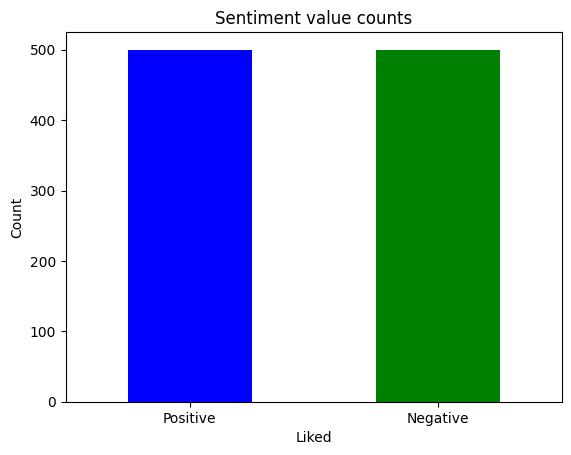

In [12]:
value_counts.plot(kind='bar',color=['blue','green'])
plt.title("Sentiment value counts")
plt.xlabel('Liked')
plt.ylabel('Count')
plt.xticks(ticks=[0,1],labels=['Positive','Negative'],rotation=0)
plt.show()

In [13]:
from wordcloud import WordCloud

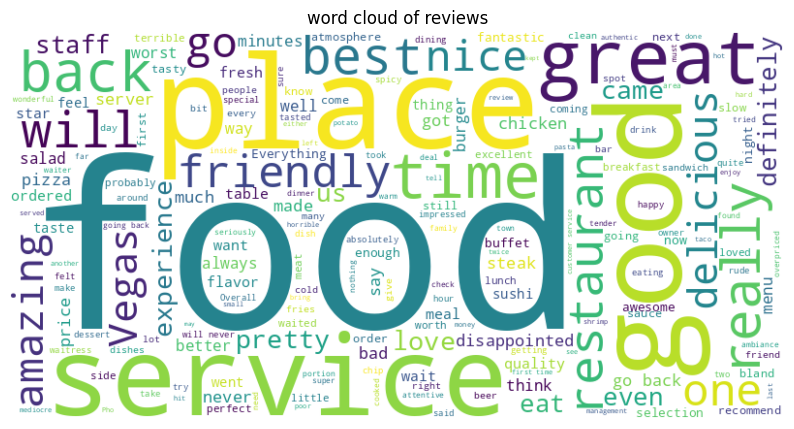

In [14]:
combined_text=" ".join(data['Review'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(combined_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('word cloud of reviews')
plt.show()

In [15]:
from collections import Counter

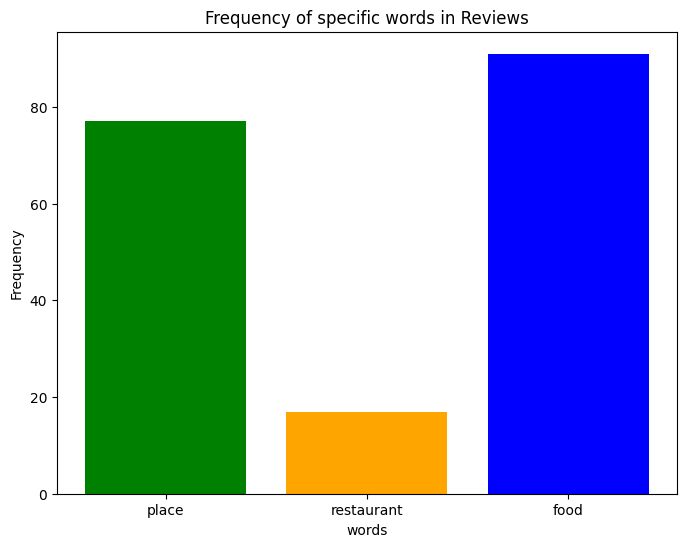

In [16]:
target_words = {'food','place','restaurant'}
all_words = " ".join(data['Review']).lower().split()
word_counts = Counter(all_words)
target_word_counts = {word:word_counts[word] for word in target_words}
plt.figure(figsize=(8, 6)) 
plt.bar(target_word_counts.keys(), target_word_counts.values(), color = {'blue','green','orange'})
plt.xlabel('words')
plt.ylabel('Frequency')
plt.title('Frequency of specific words in Reviews')
plt.show()

In [17]:
#Text Preprocessing

In [18]:
# convert dataset into lowercase
lowercase_text=data['Review'].str.lower()

In [19]:
print(lowercase_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [20]:
#tokenisation
from nltk.tokenize import word_tokenize

In [21]:
data['Tokens']=data['Review'].apply(word_tokenize)
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [23]:
data["Review"].value_counts()

Review
#NAME?                                                                                                                                    4
The food was terrible.                                                                                                                    2
I would not recommend this place.                                                                                                         2
I love this place.                                                                                                                        2
I won't be back.                                                                                                                          2
                                                                                                                                         ..
OMG, the food was delicioso!                                                                                                              1
There is noth

In [24]:
import string

In [25]:
data['Review']=data['Review'].str.replace(f"[{string.punctuation}]"," ",regex=True)

In [26]:
print(data['Review'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [27]:
data["Review"].value_counts()

Review
 NAME                                                                                                                                     4
I would not recommend this place                                                                                                          2
I love this place                                                                                                                         2
I won t be back                                                                                                                           2
Will not be back                                                                                                                          2
                                                                                                                                         ..
The burger    I got the  Gold Standard  a  17 burger and was kind of disappointed                                                         1
OMG  the food

In [28]:
# Removing the stopwords
from nltk.corpus import stopwords

In [29]:
stop_words=set(stopwords.words('english'))

In [30]:
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word.lower() not in stop_words])

In [31]:
print(data['Tokens'])

0                                    [Wow, Loved, place]
1                                          [Crust, good]
2                                [tasty, texture, nasty]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4                       [selection, menu, great, prices]
                             ...                        
995              [think, food, flavor, texture, lacking]
996                          [Appetite, instantly, gone]
997                [Overall, impressed, would, go, back]
998    [whole, experience, underwhelming, think, go, ...
999    [wasted, enough, life, poured, salt, wound, dr...
Name: Tokens, Length: 1000, dtype: object


In [32]:
#stemming
#Stemming is the process of reducing the word into root or baseword form by removing suffix
#example: driving stemmed is drive

In [33]:
#stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [34]:
stemmer = PorterStemmer()
data['stemmed']=data['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

In [35]:
print(data['stemmed'])

0                                     wow love thi place
1                                      crust is not good
2                 not tasti and the textur wa just nasti
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                               appetit instantli gone
997        overal i wa not impress and would not go back
998    the whole experi wa underwhelm and i think we ...
999    then as if i hadn t wast enough of my life the...
Name: stemmed, Length: 1000, dtype: object


In [36]:
#Lemmatization
#It is a process transforming a word into its base or dictionary form
#ex: better is lemitized to good

In [37]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/rgukt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [42]:
lemmatizer=WordNetLemmatizer()

In [43]:
data['Lemmatized']=data['Review'].apply(lambda x :' '.join(lemmatizer.lemmatize(word , pos=wordnet.VERB) for word in word_tokenize(x)))

In [44]:
#removing the numbers from reviews
import re
data['No_Numbers']=data['Review'].apply(lambda x : re.sub(r'\d+',' ',x))

In [45]:
print(data['No_Numbers'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [46]:
#removing special characters like @ # % *
data['cleaned']=data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]','',x))

In [47]:
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [48]:
#expamding method
#don't eat the food inthis hotel,whwn we apply expanted text itwill conver into do not eat food in this hotel

In [49]:
import contractions
data['Expanded']=data['Review'].apply(contractions.fix)
print(data['Expanded'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Expanded, Length: 1000, dtype: object


In [50]:
#Removing emojis
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [51]:
import emoji
data['emoji']=data['Review'].apply(emoji.demojize)

In [52]:
print(data['emoji'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: emoji, Length: 1000, dtype: object


In [53]:
#removing links from review_text
# ex: food is good visit www.anitha's Hotel.in

In [54]:
 from bs4 import BeautifulSoup

In [55]:
data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())


In [56]:
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [57]:
#TF #IDF VECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer=TfidfVectorizer()

In [58]:
X=Vectorizer.fit_transform(data['Review'])
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [59]:
#building a Machine Learning model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [60]:
vectorizer=TfidfVectorizer()

In [61]:
X=vectorizer.fit_transform(data['Review'])
y=data['Liked']

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 42)

In [63]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate the model
model = MultinomialNB()

# Fit the model
model.fit(X_train, y_train)


MultinomialNB()

In [64]:
y_pred=model.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test, y_pred)

In [66]:
report=classification_report(y_test,y_pred)

In [67]:
print(report)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [68]:
#prediction of new review
def preprocess_review(review):
    # Convert to lowercase
    review = review.lower()
    
    # Remove HTML tags
    review = BeautifulSoup(review, "html.parser").get_text()
    
    # Remove punctuation
    review = re.sub(f"[{string.punctuation}]", " ", review)
    
    # Fix contractions
    review = contractions.fix(review)
    
    # Convert emojis to text
    review = emoji.demojize(review)
    
    # Tokenize
    tokens = word_tokenize(review)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stem tokens
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in stemmed_tokens]
    
    # Join tokens back into a single string
    cleaned_review = ' '.join(lemmatized_tokens)
    
    return cleaned_review
   

In [73]:
#new review pridection
new_review= input('Enter a review')
cleaned_review=preprocess_review(new_review)
new_review_vectorized=vectorizer.transform([cleaned_review])
prediction = model.predict(new_review_vectorized)
if prediction[0]==1:
    print("the review is pridicted positive")
else:
    print("the review is pridicted Negative")

Enter a reviewworst
the review is pridicted Negative
